# (US Flights Data Exploration)
## by (Abdullah Fawzy)

## Preliminary Wrangling

> The Dataset outlines U.S. on-time performance of domestic flights operatred by large air carriers. Data is divided into several CSV files (by Year) and each file consist of 30+ columns showing various data on delay types, flight origin, destination, among others.

### In this section ...
I will read & merge files and then perform some wrangling on it.  
During wrangling, I will outline each issue I find then fix it and go to resolve the next one. 

In [99]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
random.seed(1)
np.random.seed(1)


*Instead of using full datafrmaes (each is >1Million rows, with some files up to 7Millions+), will take  suitable subset of each dataframe(20K entries per file)*

In [100]:
s = 20000 #desired sample size per dataframe

def df_sample(filename, sample_size):
    """ Quick function that reads a subset of dataframe """
    n = sum(1 for line in open(filename)) - 1 #n = number of records in file (excludes header)
    skip = sorted(random.sample(range(1,n+1),n-sample_size)) #Avoid adding 0-indexed header will not be included in the skip list
    return pd.read_csv(filename, skiprows=skip)
     

*Read CSV files and merge them into a single file*  
***Note:*** This cell has been commented out because files are so large so I would upload only resulting file (exported to csv.)


In [101]:

# df_1 = df_sample('2004.csv', s)
# df_2 = df_sample('2005.csv', s)
# df_3 = df_sample('2006.csv', s)
# df_4 = df_sample('2007.csv', s)
# df_5 = df_sample('2008.csv', s)

# df_concat = pd.concat([df_1, df_2, df_3, df_4, df_5], ignore_index=True)
# df_concat.to_csv('flights_subset.csv', 
#                  index=False, #to avoid adding a new index column
#                 encoding='utf-8')


*Create a copy of this dataset to manipulate and clean*

In [102]:
df = pd.read_csv('flights_subset.csv')          
df_flights = df.copy()

In [103]:
print(df_flights.shape)
df_flights.info()

(100000, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               100000 non-null  int64  
 1   Month              100000 non-null  int64  
 2   DayofMonth         100000 non-null  int64  
 3   DayOfWeek          100000 non-null  int64  
 4   DepTime            97937 non-null   float64
 5   CRSDepTime         100000 non-null  int64  
 6   ArrTime            97730 non-null   float64
 7   CRSArrTime         100000 non-null  int64  
 8   UniqueCarrier      100000 non-null  object 
 9   FlightNum          100000 non-null  int64  
 10  TailNum            99634 non-null   object 
 11  ActualElapsedTime  97730 non-null   float64
 12  CRSElapsedTime     99993 non-null   float64
 13  AirTime            97730 non-null   float64
 14  ArrDelay           97730 non-null   float64
 15  DepDelay           97937 non-null   flo

In [104]:
df_flights.Year.value_counts()

2008    20000
2007    20000
2006    20000
2005    20000
2004    20000
Name: Year, dtype: int64

*Merge looks good.*

In [105]:
df_flights.sample(20)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
43660,2006,3,15,3,1543.0,1545,1634.0,1642,OO,6964,...,3.0,16.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
87278,2008,2,4,1,2133.0,2104,2235.0,2212,US,627,...,7.0,15.0,0,NaN,0,23.0,0.0,0.0,0.0,0.0
14317,2004,9,25,6,2003.0,2003,2252.0,2300,MQ,4055,...,3.0,20.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
81932,2008,1,13,7,2250.0,2250,618.0,623,UA,238,...,4.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
95321,2008,4,12,6,655.0,655,918.0,920,WN,2775,...,5.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5405,2004,4,2,5,1655.0,1655,1838.0,1810,OH,5112,...,2.0,39.0,0,NaN,0,0.0,0.0,28.0,0.0,0.0
33188,2005,8,6,6,1952.0,1953,2121.0,2129,AS,74,...,5.0,7.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
63421,2007,3,29,4,943.0,945,1058.0,1125,WN,773,...,2.0,8.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
72897,2007,8,10,5,2115.0,2118,2217.0,2227,NW,1013,...,7.0,15.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
9507,2004,6,3,4,1351.0,1355,1622.0,1635,B6,58,...,3.0,16.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


### Wrangling issues
#### Issue #1:
- Departure times & Arrival times has missing values, suspect these are cancelled flights

In [106]:
df_flights.Cancelled.value_counts()

0    97937
1     2063
Name: Cancelled, dtype: int64

In [107]:
df_flights[df_flights.DepTime.isnull()].count()[0]

2063

*A quick check shows that missing departure time entries are related to cancelled flights*  
**Fix:** I'm not interested in flight cancellations, will remove these entries

In [108]:
df_flights = df_flights[df_flights.Cancelled ==0]

In [109]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97937 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               97937 non-null  int64  
 1   Month              97937 non-null  int64  
 2   DayofMonth         97937 non-null  int64  
 3   DayOfWeek          97937 non-null  int64  
 4   DepTime            97937 non-null  float64
 5   CRSDepTime         97937 non-null  int64  
 6   ArrTime            97730 non-null  float64
 7   CRSArrTime         97937 non-null  int64  
 8   UniqueCarrier      97937 non-null  object 
 9   FlightNum          97937 non-null  int64  
 10  TailNum            97937 non-null  object 
 11  ActualElapsedTime  97730 non-null  float64
 12  CRSElapsedTime     97933 non-null  float64
 13  AirTime            97730 non-null  float64
 14  ArrDelay           97730 non-null  float64
 15  DepDelay           97937 non-null  float64
 16  Origin             979

#### Issue #2:
- There are still some missing "ArrTime (Arrival Time) entries" 

In [110]:
df_flights[df_flights.ArrTime.isnull()].sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
71731,2007,8,21,2,1554.0,1555,NaN,1815,WN,347,...,0.0,96.0,0,NaN,1,0.0,0.0,0.0,0.0,0.0
96949,2008,4,25,5,1247.0,1100,NaN,1659,UA,442,...,NaN,10.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
95980,2008,4,9,3,2022.0,1905,NaN,2235,XE,3096,...,NaN,13.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
92602,2008,3,19,3,1515.0,1420,NaN,1703,DL,1846,...,NaN,38.0,0,NaN,1,NaN,NaN,NaN,NaN,NaN
4601,2004,3,20,6,1659.0,1707,NaN,1848,AA,2067,...,169.0,154.0,0,NaN,1,0.0,0.0,0.0,0.0,0.0
76560,2007,10,15,1,1448.0,1440,NaN,1639,CO,509,...,0.0,15.0,0,NaN,1,0.0,0.0,0.0,0.0,0.0
67563,2007,5,16,3,1551.0,1500,NaN,1627,FL,459,...,0.0,39.0,0,NaN,1,0.0,0.0,0.0,0.0,0.0
46764,2006,5,24,3,1840.0,1755,NaN,30,WN,1129,...,0.0,13.0,0,NaN,1,0.0,0.0,0.0,0.0,0.0
49580,2006,6,23,5,1218.0,1216,NaN,1703,AA,1466,...,0.0,45.0,0,NaN,1,0.0,0.0,0.0,0.0,0.0
72556,2007,8,16,4,1137.0,1137,NaN,1317,EV,4479,...,0.0,10.0,0,NaN,1,0.0,0.0,0.0,0.0,0.0


In [111]:
print(df_flights[df_flights.ArrTime.isnull()].ActualElapsedTime.sum())
print(df_flights[df_flights.ArrTime.isnull()].AirTime.sum())
print(df_flights[df_flights.ArrTime.isnull()].ArrDelay.sum())


0.0
0.0
0.0


*With multiple missing fields, I don't see a way to retrieve the actual arrival delays*  

**Fix:** Will remove these entries

In [112]:
df_flights = df_flights[df_flights.ArrTime.notnull()]

##### Issue #3 
- Delay columns (last 5) has some entries reported as **NAN** while others reproted as **0** 

In [113]:
df_flights[df_flights.CarrierDelay.isnull()].sample(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
88191,2008,2,17,7,1120.0,1130,1155.0,1159,HA,140,...,4.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
94707,2008,3,30,7,749.0,735,1008.0,1003,B6,117,...,3.0,30.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
94495,2008,3,7,5,1549.0,1559,1800.0,1814,AS,476,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
90760,2008,3,28,5,1120.0,1120,1237.0,1235,WN,2465,...,3.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
83808,2008,1,6,7,628.0,630,751.0,807,NW,1223,...,6.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
98242,2008,4,5,6,722.0,725,807.0,815,MQ,3587,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
99759,2008,4,17,4,1258.0,1300,1710.0,1727,CO,276,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
88213,2008,2,3,7,1630.0,1635,1719.0,1722,MQ,3037,...,7.0,15.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
98643,2008,4,17,4,1216.0,1220,1825.0,1828,NW,964,...,8.0,22.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
85688,2008,2,20,3,1539.0,1525,1650.0,1640,WN,3864,...,3.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


*It seems like 2008 data reports delays as NaN while in other years it's reported as 0.*

**Fix:** Will convert 2008 NaN values to 0 for consistency

In [114]:
df_flights[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']] = \
df_flights[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].fillna(0)


#### Note: 
   - It may be tempting to melt these 5 columns but I wouldn't do that since these values aren't mutually exclusive (**i.e. you may have many delays simultaneously for the same flight**)

#### Issue #4
- Arrival & Departure times are reported as float with 4 digits (hhmm). This won't be very useful for analysis

In [115]:
df_flights[['ArrTime', 'DepTime']].describe()

,ArrTime,DepTime
count,97730.000000,97730.000000
mean,1489.459849,1342.516239
std,501.674326,476.916751
min,1.000000,1.000000
25%,1112.000000,933.000000
50%,1517.000000,1330.000000
75%,1914.000000,1733.750000
max,2635.000000,2521.000000


*A side issue is that some times are >2400. will resolve this first*

In [116]:
df_flights.ArrTime.loc[lambda x: x>2400] = df_flights.ArrTime.loc[lambda x: x>2400].sub(2400)
df_flights.DepTime.loc[lambda x: x>2400] = df_flights.DepTime.loc[lambda x: x>2400].sub(2400)

C:\Users\I7san\anaconda3\envs\py3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Fix:** These values wouldn't help much with data manipulation. Will create new columns **DepHour & ArrHour** with hours between 0-23

In [117]:
labels = np.arange(0, 24, 1)

df_flights['DepHour'] = pd.cut(df_flights['DepTime'], bins=24, labels=labels)
df_flights['ArrHour'] = pd.cut(df_flights['ArrTime'], bins=24, labels=labels)

In [118]:
df_flights[['DepTime', 'ArrTime', 'DepHour','ArrHour' ]].tail(10)

,DepTime,ArrTime,DepHour,ArrHour
99990,614.0,1407.0,6,14
99991,1335.0,1628.0,13,16
99992,1652.0,2001.0,16,20
99993,1239.0,1442.0,12,14
99994,1355.0,1634.0,13,16
99995,1933.0,2054.0,19,20
99996,657.0,956.0,6,9
99997,1850.0,2030.0,18,20
99998,2008.0,2258.0,20,22
99999,654.0,944.0,6,9


*All looks good.*

#### Issue #5:
- Year/Month/Days columns are Integers.

**Fix:** Will change to ordered categories for easy analysis

First, will create ordered categories for *Year/ Month/ DayofMonth* columns

In [119]:
year_cat = pd.api.types.CategoricalDtype(categories=np.arange(2004, 2009, 1), ordered=True)
month_cat =  pd.api.types.CategoricalDtype(categories=np.arange(1, 13, 1), ordered=True)
monthday_cat = pd.api.types.CategoricalDtype(categories=np.arange(1, 32, 1), ordered=True)

Then, apply ordered categories to the respective columns

In [120]:
df_flights.Year = df_flights.Year.astype(year_cat)
df_flights.Month = df_flights.Month.astype(month_cat)
df_flights.DayofMonth =  df_flights.DayofMonth.astype(monthday_cat)

Also, for Weekday, will first convert numbers to days, [1: Monday -> 7: Sunday] and then apply an ordered category for this column

In [121]:
dayOfWeek={1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'}
df_flights['DayOfWeek'] = df_flights['DayOfWeek'].map(dayOfWeek)
weekday_cat = pd.api.types.CategoricalDtype(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)
df_flights['DayOfWeek'] = df_flights['DayOfWeek'].astype(weekday_cat)


In [122]:
df_flights.DayOfWeek.dtype


CategoricalDtype(categories=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True)

In [123]:
df_flights.DayofMonth.dtypes

CategoricalDtype(categories=[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
                  16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
                  31],
                 ordered=True)

In [124]:
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepHour,ArrHour
0,2004,1,29,Thu,1633.0,1640,1943.0,1952,UA,466,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,16,19
1,2004,1,1,Thu,1921.0,1922,2300.0,2301,UA,468,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,19,22
2,2004,1,30,Fri,1542.0,1546,1712.0,1715,UA,482,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,15,17
3,2004,1,2,Fri,2024.0,1650,4.0,1926,UA,489,...,0,NaN,0,0.0,0.0,65.0,0.0,213.0,20,0
4,2004,1,25,Sun,837.0,842,1007.0,1017,UA,497,...,0,NaN,0,0.0,0.0,0.0,0.0,0.0,8,10


In [125]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97730 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               97730 non-null  category
 1   Month              97730 non-null  category
 2   DayofMonth         97730 non-null  category
 3   DayOfWeek          97730 non-null  category
 4   DepTime            97730 non-null  float64 
 5   CRSDepTime         97730 non-null  int64   
 6   ArrTime            97730 non-null  float64 
 7   CRSArrTime         97730 non-null  int64   
 8   UniqueCarrier      97730 non-null  object  
 9   FlightNum          97730 non-null  int64   
 10  TailNum            97730 non-null  object  
 11  ActualElapsedTime  97730 non-null  float64 
 12  CRSElapsedTime     97730 non-null  float64 
 13  AirTime            97730 non-null  float64 
 14  ArrDelay           97730 non-null  float64 
 15  DepDelay           97730 non-null  float64 
 16  Orig

**Issue #6:** Remove redundant columns

- No Diverted information for any flights, will remove the column
- Cancelled & CancellationCode columns are redundant now, will remove them.
- These are the columns to drop : 
    - DepTime (replaced by DepHour)
    - ArrTime (replaced by ArrHour)
    - CRSDepTime (won't use)      
    - CRSArrTime (won't use)      
    - AirTime (won't use)
    - FlightNum  (won't use)  
    - CRSElapsedTime (won't use)
    - ActualElapsedTime(won't use)
    - TailNum    (won't use)        
    - TaxiIn     (won't use)        
    - TaxiOut    (won't use)        
    - Cancelled  (won't use)       
    - CancellationCode (won't use)  
    - Diverted  (No values available)
 



In [126]:
redundant_columns = ['DepTime', 'ArrTime', 'CRSDepTime', 'CRSArrTime', 'AirTime', 
                     'FlightNum','CRSElapsedTime', 'ActualElapsedTime', 'TailNum',
                     'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted']
df_flights = df_flights.drop(redundant_columns, axis=1)

Will also change column order for convenience 

In [127]:
column_order = ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin',
                'Dest', 'Distance', 'DepHour','ArrHour', 'ArrDelay', 'DepDelay',  'CarrierDelay',
                'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']                

In [128]:
df_flights = df_flights[column_order]
df_flights.head(3)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,DepHour,ArrHour,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,29,Thu,UA,SMF,DEN,910,16,19,-9.0,-7.0,0.0,0.0,0.0,0.0,0.0
1,2004,1,1,Thu,UA,ORD,TPA,1012,19,22,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0
2,2004,1,30,Fri,UA,OMA,ORD,416,15,17,-3.0,-4.0,0.0,0.0,0.0,0.0,0.0


---------------------------

### What is the structure of your dataset?

> There is around 97,000 flight in the subset of the dataset I chose for US filght data between 2004 to 2008 ( 5 years). After data Wrangling, I chose to keep around 16 features to predict flight delays (Arrival Delay).  

Main features include:
- **Year:** 2004 - 2008  
- **Month:** 1 - 12  
- **DayofMonth:** 1 - 31  
- **DayOfWeek:** Monday - Sunday  
- **UniqueCarrier:** Unique carrier code       
- **DepDelay:** Departure delay (Difference in minutes between scheduled and actual departure time. in minutes)  
- **ArrDelay:** Arrival delay( Difference in minutes between scheduled and actual arrival time. in minutes)  
- **Origin:** origin IATA airport code  
- **Dest:** destination IATA airport code  
- **Distance:** Distance between airports (miles)             
 
- **CarrierDelay:** The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.) in minutes.       
- **WeatherDelay:** Significant meteorological conditions (actual or forecasted) (in minutes)       
- **NASDelay:** Delays and cancellations attributable to the National aviation System (in minutes)            
- **SecurityDelay:** Delays or cancellations caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach (in minutes)      
- **LateAircraftDelay:** A previous flight with same aircraft arrived late, causing the present flight to depart late (in minutes)  
- **DepHour:** Flight departure hour (0-23)            
- **ArrHour:** Flight arrival hour (0-23)            

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is **Arrival Delay (ArrDelay).** In essence, I will explore what are the main features that can help predict the number of minutes a flight is delayed or advanced "early arrival"

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the 5 sources of delay (carrier, weather, NAS, security, and late aircraft) will play a signficant role in predicting arrival delay. Also other factors such as flight time (month/week/day), unique carrier,  flight origin and destination can play a part too.

## Univariate Visualization

### In this section ...
I will explore the main factors(numeric & categorical) that may help predict  flight arrival delay. 

#### Preliminary step: 
I  will check first explore general data distribution and look for outliers/errors.  
    **By the end of this part, will export data to CSV to be used later** 

In [129]:
df_flights.describe()

,Distance,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,97730.000000,97730.000000,97730.000000,97730.000000,97730.000000,97730.000000,97730.000000,97730.000000
mean,723.216668,8.442771,9.783966,3.395314,0.718981,3.682421,0.027934,4.452338
std,566.198386,36.835411,33.525862,19.287891,9.276634,15.617721,1.194984,19.525588
min,27.000000,-75.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,318.000000,-9.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,569.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,951.750000,12.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4962.000000,1144.000000,1123.000000,1094.000000,727.000000,858.000000,149.000000,612.000000


*Many columns are showing outliers(i.e. ArrDelay, DepDelay, etc). Will chek these further*
    

In [130]:
df_flights[df_flights.ArrDelay >500]

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,DepHour,ArrHour,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3304,2004,3,27,Sat,UA,SJU,ORD,2072,8,12,975.0,979.0,740.0,0.0,0.0,0.0,235.0
22019,2005,2,20,Sun,NW,LIT,MEM,129,6,7,1144.0,1123.0,1094.0,0.0,21.0,0.0,29.0
23818,2005,3,23,Wed,XE,EWR,ROC,246,0,2,520.0,460.0,0.0,460.0,60.0,0.0,0.0
23881,2005,3,23,Wed,XE,ALB,CLE,424,3,4,532.0,553.0,532.0,0.0,0.0,0.0,0.0
24498,2005,3,8,Tue,AA,LGA,MIA,1097,22,2,571.0,501.0,0.0,55.0,70.0,0.0,446.0
31349,2005,7,5,Tue,AA,PHL,ORD,678,10,11,976.0,994.0,801.0,0.0,0.0,0.0,175.0
34639,2005,9,22,Thu,NW,CLE,DTW,95,6,7,728.0,727.0,0.0,727.0,1.0,0.0,0.0
38001,2005,11,25,Fri,NW,MSP,RDU,981,6,9,706.0,714.0,673.0,0.0,0.0,0.0,33.0
38827,2005,12,17,Sat,NW,ALB,DTW,488,17,19,508.0,474.0,474.0,0.0,34.0,0.0,0.0
45733,2006,4,21,Fri,EV,OKC,SLC,866,18,19,546.0,565.0,546.0,0.0,0.0,0.0,0.0


*Will ensure all Arrival delay values were calculated correctly*

In [131]:
temp = df_flights[df_flights.ArrDelay >500]

((temp.CarrierDelay + temp.WeatherDelay + temp.NASDelay + temp.SecurityDelay + temp.LateAircraftDelay)
- temp.ArrDelay).sum()

0.0

**All values are legitimate based on Depature delay and other information.**  
**Fix:** Since there is a very low number of outliers (27 out of ~100K points) may distort visualizations. So will remove them


In [132]:
ArrDelay_index = df_flights[df_flights.ArrDelay >500].index
df_flights.drop(ArrDelay_index, inplace=True)

In [133]:
df_flights.describe()

,Distance,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,97703.000000,97703.000000,97703.000000,97703.000000,97703.000000,97703.000000,97703.000000,97703.000000
mean,723.198991,8.248304,9.591998,3.256799,0.700726,3.665773,0.027942,4.432341
std,566.207592,34.766996,31.282957,16.424673,8.676301,15.295277,1.195149,19.340906
min,27.000000,-75.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,318.000000,-9.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,569.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,951.000000,12.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4962.000000,499.000000,525.000000,499.000000,411.000000,460.000000,149.000000,467.000000


*All main outliers issues seems to have been resolved in one step*

#### Export to CSV (for later use)

In [134]:
df_flights = df_flights.reset_index(drop=True)
df_flights.to_csv('flights_subset_clean.csv', 
                 index=False, #to avoid adding a new index column
                encoding='utf-8')


### Now: Visual Exploration
- Will start by checking the distribution of the main variable of interest: **ArrDelay**

In [135]:
#This function will help with simplifying adding metadata to charts

def chart_metadata(**kwargs):
    """ Quick function to add labels, limits, titles to a chart"""
    x_label = kwargs.get('xlabel', None)
    y_label = kwargs.get('ylabel', None)
    x_lim = kwargs.get('xlim', None)
    y_lim = kwargs.get('ylim', None)
    title = kwargs.get('title', None)
    
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)


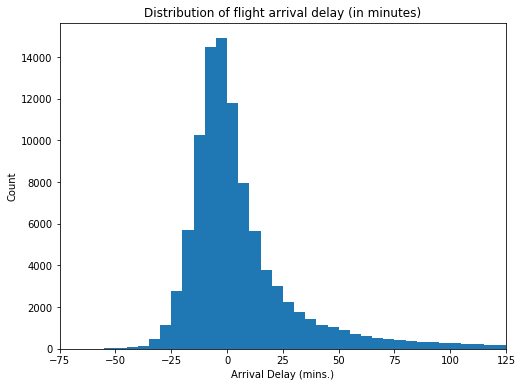

In [136]:
plt.figure(figsize=(8, 6))

bins = np.arange(df_flights.ArrDelay.min(),df_flights.ArrDelay.max(), 5)
plt.hist(data=df_flights, x='ArrDelay', bins=bins);
chart_metadata(xlim=(df_flights.ArrDelay.min(), 125),
               xlabel=('Arrival Delay (mins.)') ,
               ylabel=  ('Count'),
               title='Distribution of flight arrival delay (in minutes)'
              )


>**Insights:**  
>- Delay information are centered around 0 which is normal (flight on time) with +/- 5 mins in each direction.
>- Most of the data falls in the range of -25/+25 minutes with a long tail to the right

***Note:***  
It's not helpful to make a log transformation since there are negative delays (plane arrived early). Anyway, xlim does a good job in this situation

- Next, will explore the main 5 reasons for flight delay 

In [137]:
delay_types = ['LateAircraftDelay', 'NASDelay',  'CarrierDelay', 'WeatherDelay', 'SecurityDelay', 'DepDelay', 'ArrDelay' ]
delay_labels = ['Late Aircraft Delay', 'NAS Delay', 'Carrier Delay',  'Weather Delay', 'Security Delay','DepDelay', 'ArrDelay']

<ipython-input-138-8a5385727a74>:12: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[j].set_xlim(0, df_flights[i].max()+100)


Text(0.5, 0.98, 'Distribution of main sources of delay')

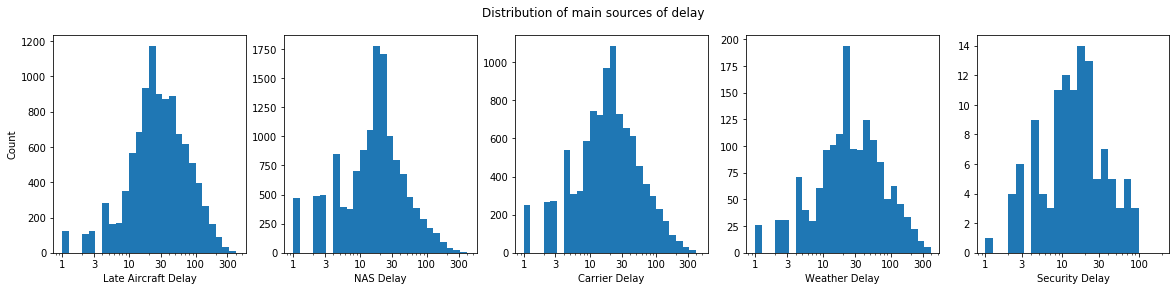

In [138]:
fig, ax = plt.subplots(ncols=5, figsize = [20,4])


for i, j in zip(delay_types[:5], range(len(delay_types)-2)):

    bins = 10 ** np.arange(0, np.log10(df_flights[i].max()+0.1), 0.1)
    ax[j].hist(df_flights[i], bins=bins)
    ax[j].set_xscale('log')
    tick_locs = [1, 3, 10, 30, 100, 300, 1000]
    ax[j].set_xticks(tick_locs)
    ax[j].set_xticklabels(tick_locs)
    ax[j].set_xlim(0, df_flights[i].max()+100)
    ax[j].set_xlabel("{}".format(delay_labels[j]))
ax[0].set_ylabel("Count");
plt.suptitle('Distribution of main sources of delay')

>**Insights**  
>- Different delay times are almost always peaking around 15  
>- Security issues are causing less delays (on avg)
>- Carrier delay is having the most spread out delays (some of which are >300)

**However**, it's obvious that y-axis have different scale for each variable. will set x & y limits for consistent comparison


<ipython-input-139-d965fb7a3dfc>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[j].set_xlim(0, df_flights[i].max()+100)


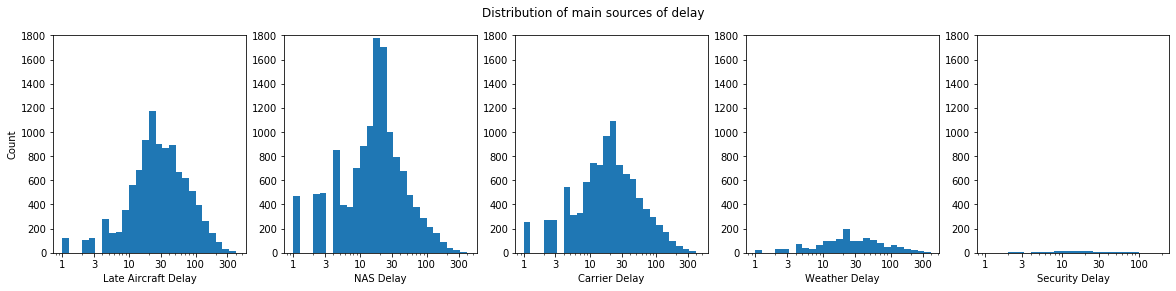

In [139]:
fig, ax = plt.subplots(ncols=5, figsize = [20,4])


for i, j in zip(delay_types[:5], range(len(delay_types)-2)):

    bins = 10 ** np.arange(0, np.log10(df_flights[i].max()+0.1), 0.1)
    ax[j].hist(df_flights[i], bins=bins)
    ax[j].set_xscale('log')
    ax[j].set_xticks(tick_locs)
    ax[j].set_xticklabels(tick_locs)
    ax[j].set_xlim(0, df_flights[i].max()+100)
    ax[j].set_ylim(0,1800)
    ax[j].set_xlabel("{}".format(delay_labels[j]))
ax[0].set_ylabel("Count")
plt.suptitle('Distribution of main sources of delay');


>*Now it seems that Carrier Delay, Nas Delay and Late Aircraft Delays are the most significant ones.*

- Next, will check for flight distribution over days, weeks and months

Text(0.5, 0, 'Week day')

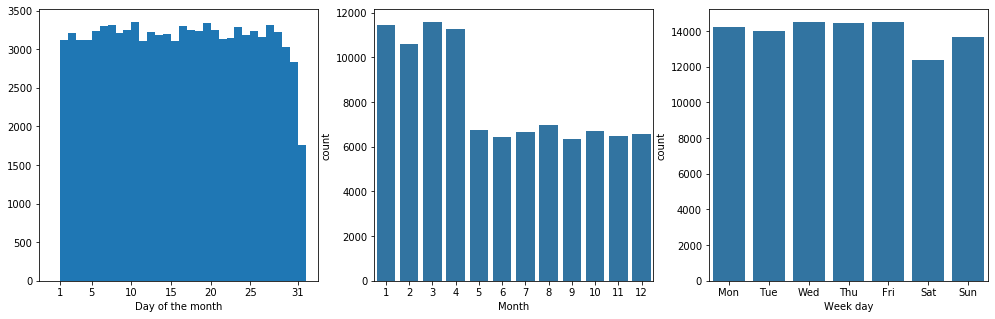

In [140]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [17, 5])

plt.subplot(1, 3, 1)
bins = np.arange(0, 33, 1)
plt.hist(df_flights.DayofMonth, bins=bins)
#ticks = 
plt.xticks([1, 5, 10, 15, 20, 25, 31], ['1', '5', '10', '15', '20', '25', '31'])
plt.xlabel('Day of the month')

plt.subplot(1, 3, 2)
sb.countplot(data=df_flights, x=df_flights.Month, color=base_color)


plt.subplot(1, 3, 3)
sb.countplot(data=df_flights, x=df_flights.DayOfWeek, color=base_color)
plt.xlabel('Week day')




>**Inisghts:**  
>- Weekend days have slightly less flights than the rest of the week
>- less flights at end of the month, this may be just because half of the months doesn't have 31 days.
>- **Very interesting:**  Month has less counts starting from May to Dec. Will check this further

In [141]:
print(df_flights[df_flights.Year==2008].Month.value_counts())
df_flights[df_flights.Year==2004].Month.value_counts()

1     5000
3     4893
4     4825
2     4707
12       0
11       0
10       0
9        0
8        0
7        0
6        0
5        0
Name: Month, dtype: int64


8     1732
12    1729
11    1705
7     1680
10    1641
3     1641
5     1620
9     1591
6     1583
2     1565
1     1561
4     1551
Name: Month, dtype: int64

***It looks like All 2008 data is between Months 1 & 4. This is causing a huge spike on these months. So need to be careful of biases in analysis due to this***

- Now will check the distribution of flights' Arrival & Departure Hours 

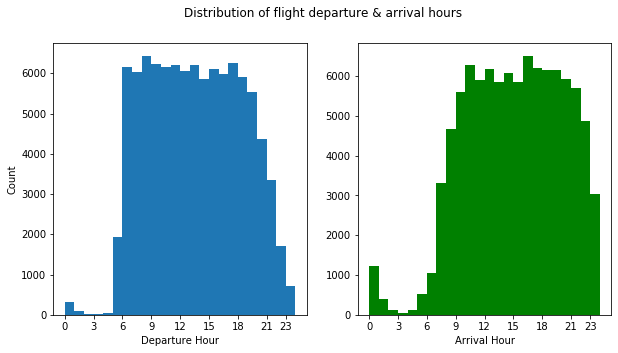

In [142]:
plt.figure(figsize = [10, 5])
time_list = [0, 3, 6, 9, 12, 15, 18, 21, 23]


plt.subplot(1, 2, 1)
plt.hist(df_flights.DepHour, bins=np.arange(0, 25, 1))
plt.xlabel('Departure Hour')
plt.ylabel('Count')
plt.xticks(time_list, time_list)

plt.subplot(1, 2, 2)
plt.hist(df_flights.ArrHour, bins=np.arange(0, 25, 1), color='g')
plt.xlabel('Arrival Hour')
plt.xticks(time_list, time_list)

plt.suptitle('Distribution of flight departure & arrival hours')
plt.show()

>**Insights**    
>- Most planes depart between 6 AM and 7 PM while they mostly arrive between 9 AM and 9 PM
>- Very low number of planes Depart or Arrive at mid-night but there are more arrivals though.

- Finally, will look into Unique carriers with top number of flights

Text(0.5, 0, 'Top Carrier (delayed flights)')

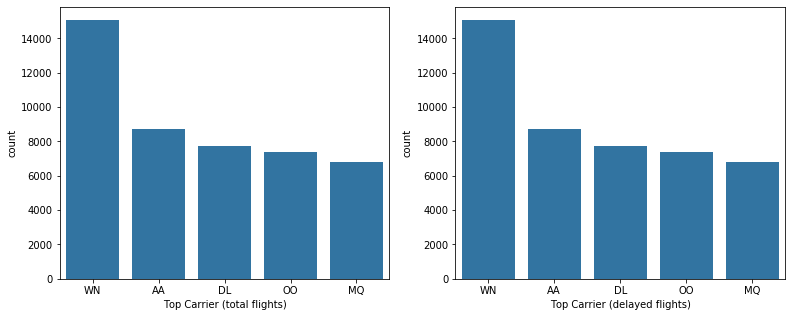

In [143]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [13, 5])

plt.subplot(1, 2, 1)
cat_order = df_flights.UniqueCarrier.value_counts().index[0:5]
sb.countplot(data=df_flights, x=df_flights.UniqueCarrier,order = cat_order, color=base_color)
plt.xlabel('Top Carrier (total flights)')

plt.subplot(1, 2, 2)
cat_order = df_flights[df_flights.ArrDelay>0].UniqueCarrier.value_counts().index[0:5]
sb.countplot(data=df_flights, x=df_flights.UniqueCarrier,order = cat_order, color=base_color)
plt.xlabel('Top Carrier (delayed flights)')

>**Insights:**
>- it seems that the distribution of top Carriers (WN, AA, DL, OD, and MQ) is the same for both total flights & delayed flights.
>- **To avoid biases, will not continue this roue**

- Will repeat the previous exploration with flight destinations

Text(0.5, 0, 'Top Destinations (by delayed flights)')

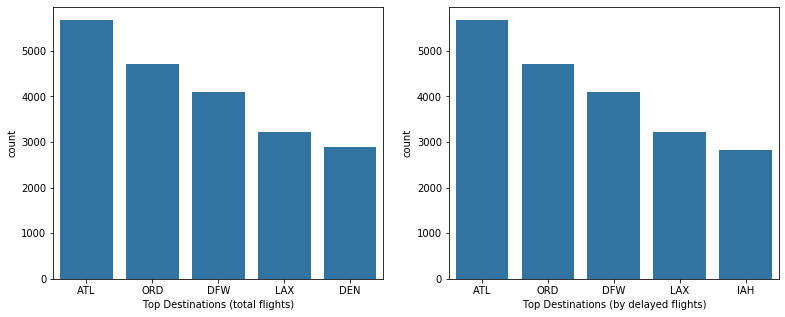

In [144]:
plt.figure(figsize = [13, 5])

plt.subplot(1, 2, 1)
cat_order = df_flights.Dest.value_counts().index[0:5]
sb.countplot(data=df_flights, x=df_flights.Dest,order = cat_order, color=base_color)
plt.xlabel('Top Destinations (total flights)')

plt.subplot(1, 2, 2)
cat_order = df_flights[df_flights.ArrDelay>0].Dest.value_counts().index[0:5]
sb.countplot(data=df_flights, x=df_flights.Dest,order = cat_order, color=base_color)
plt.xlabel('Top Destinations (by delayed flights)')

>-  Same as Unique Carrier, Destinations has roughly same distribution (for total & delayed flights). 
>- **Again, will not explore this data further to avoid biases**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>- The main variable of interest **(Arrival Delay)** is centered around 0 with most of flights arriving witin +/- 25 minutes of expected time. However, data has a long tail of flights to the right (long delay)  
>-  **Log transformation** was needed to compare sources of delay (carrier, NAS, etc.). Applying y-axis limit showed significant difference in number of points for different variables  
>- **Surprising insight:** Data set shown much more flights between January - April compared to other months. However, this seemed to be an issue with the 2008 dataset which had only 4 months of data

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>- A preliminary wrangling was performed at the start of this section since the dataset had a low number of very large outliers that needed to be resplved
>- Distribution of Carrier, Origin and Destination looked tricky. On the one hand, distribution may suggest that certain carriers, origins, etc. are source for more delays. **However**, further exploration showed interesting results. For instance, certain carriers showed more delays, but when exploring absolute counts of flights, same carriers are also on top of the list. For this reason, I decided not to explore this route any further.


-----------------------------------

## Bivariate Exploration

### In this section ...

Will explore relationships between multiple sets of 2-variables and explore how they may predict **arrival delay** (variable of interest)

- First, will start by taking a fraction of the dataframe (10%) which will help with some visualizations

In [145]:
# I'll focus on data that has late arrivals flights
df_delayed_sample = df_flights[df_flights.ArrDelay>0].sample(frac=0.1, replace=True, random_state=1) 

In [146]:
df_delayed_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4441 entries, 73656 to 87788
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               4441 non-null   category
 1   Month              4441 non-null   category
 2   DayofMonth         4441 non-null   category
 3   DayOfWeek          4441 non-null   category
 4   UniqueCarrier      4441 non-null   object  
 5   Origin             4441 non-null   object  
 6   Dest               4441 non-null   object  
 7   Distance           4441 non-null   int64   
 8   DepHour            4441 non-null   category
 9   ArrHour            4441 non-null   category
 10  ArrDelay           4441 non-null   float64 
 11  DepDelay           4441 non-null   float64 
 12  CarrierDelay       4441 non-null   float64 
 13  WeatherDelay       4441 non-null   float64 
 14  NASDelay           4441 non-null   float64 
 15  SecurityDelay      4441 non-null   float64 
 16  L

- Now will explore general relationships between different delay sources & Arrival delay

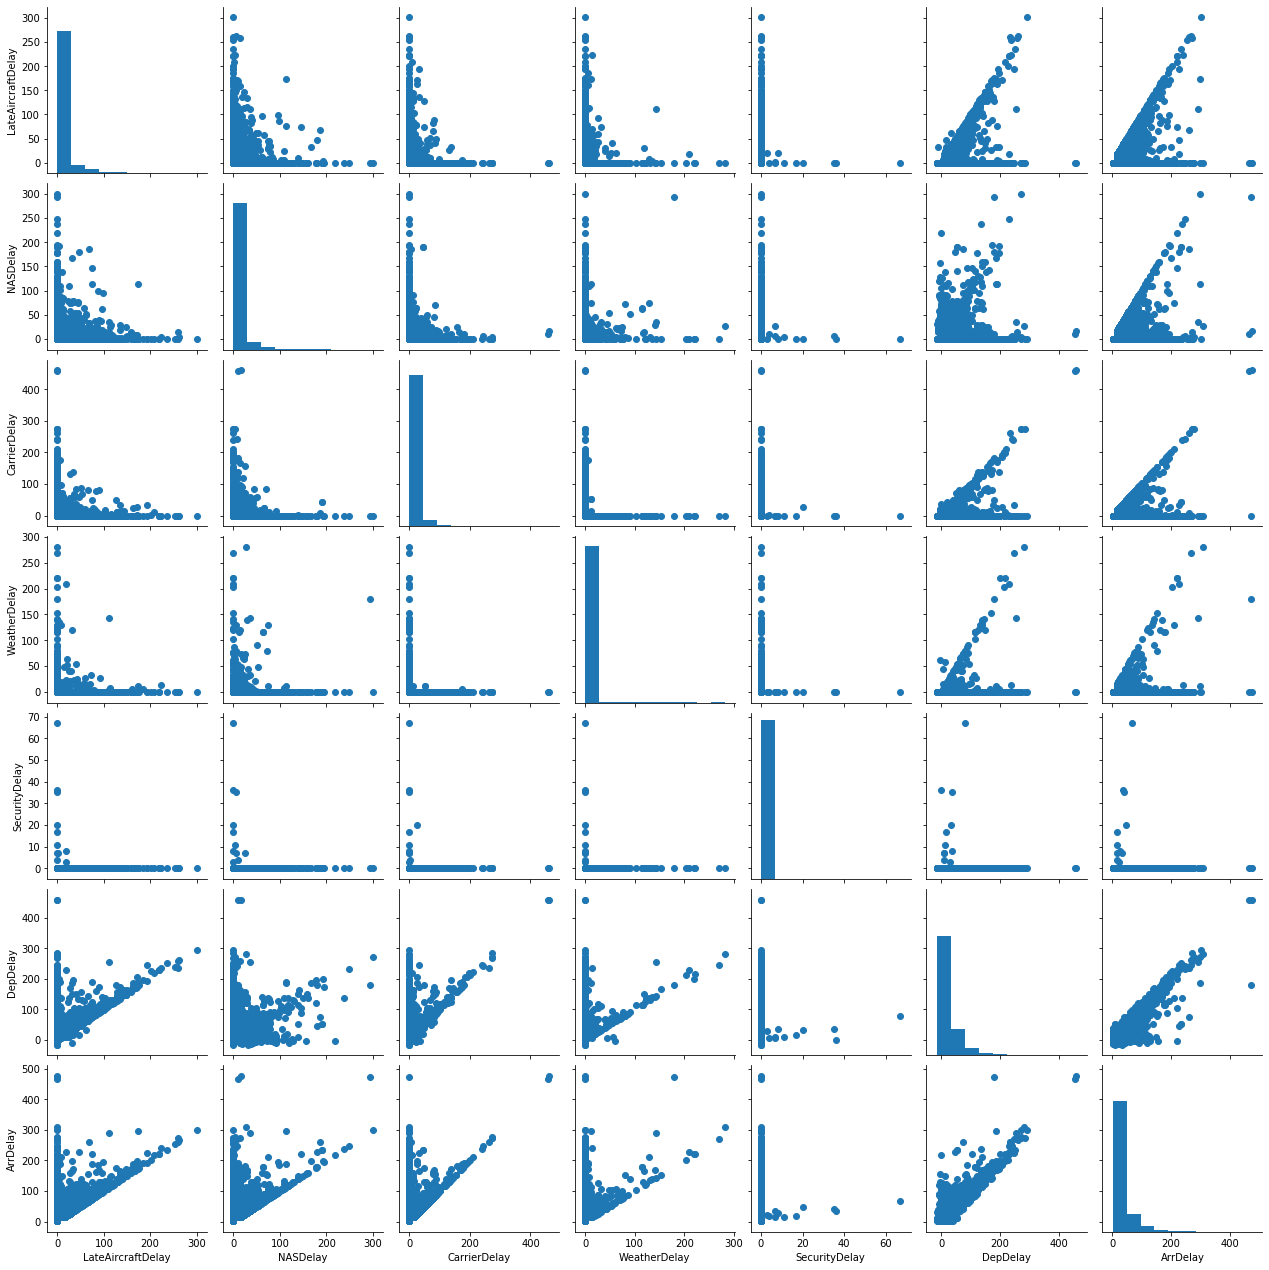

In [147]:
g = sb.PairGrid(data = df_delayed_sample[delay_types])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

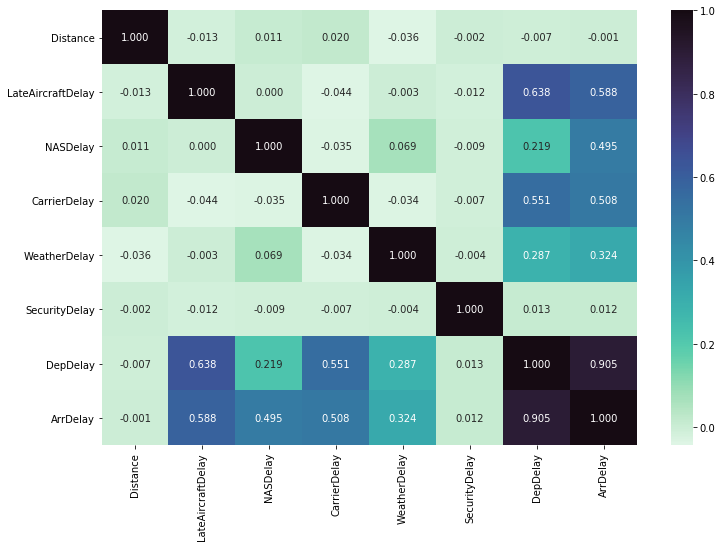

In [148]:
corr = delay_types.copy()
corr.insert(0, 'Distance')

plt.figure(figsize=(12, 8))
sb.heatmap(df_delayed_sample[corr].corr(), annot = True, fmt = '.3f',
           cmap = 'mako_r', center = 0.5)
plt.show()

> **Insights:**
>- Late AirCraft Delay, Carrier Delay, and NAS delay are contributing most to delay (in terms of correlation)
>- Late Departure == Late Arrival. Will explore this further next
>- No significant correlation between distance and any other variable

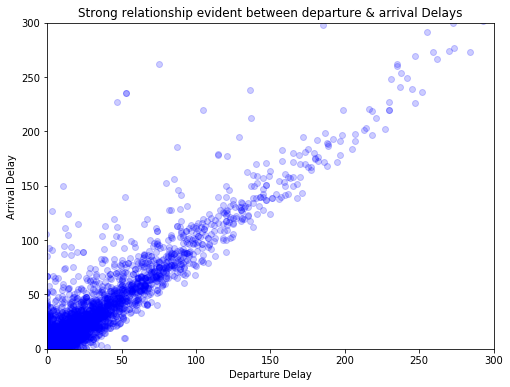

In [149]:
plt.figure(figsize=(8, 6))

sb.regplot(data=df_delayed_sample, x='DepDelay', y='ArrDelay', fit_reg=False,
           x_jitter = 0.1, y_jitter = 0.1, scatter_kws = {'alpha' : 0.2}, line_kws={"color": "black"}, color='b')
#
chart_metadata(xlim=(0,300), ylim=(0,300), xlabel='Departure Delay',
       ylabel='Arrival Delay', title='Strong relationship evident between departure & arrival Delays')

>**Insights:**
>- It's pretty clear that most flights that departs late also arrives late. For small flight latency, there seem to be less strong relationship between departure & arrival delays.  

- Will plot the same relationship but for smaller latencies

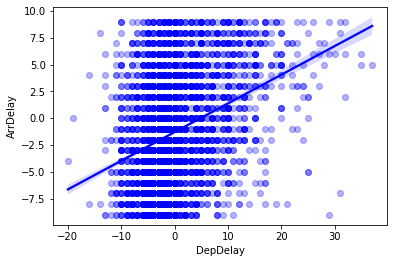

In [150]:
temp = df_flights[(df_flights.ArrDelay>-10) & ((df_flights.ArrDelay<10))].sample(frac=0.1, replace=True, random_state=1)

sb.regplot(data=temp, x='DepDelay', y='ArrDelay', fit_reg=True,
            scatter_kws = {'alpha' : 0.3}, color='b')

>**Insights:** 
>- As expected, the relationship is not very salient for these small delays (+/- 10mins).  This suggest that many of the data can't be explained by the regression line
>- Although you may argue that these main trend is positive too. It **seems that relationship is weak and many other variables may be involved**

- Building upon the previous insights, will check the main 3 sources of delay:  
    - Carrier Delay  
    - Late Arrival Delay  
    - NAS Delay  

Will start by building a function to count number of points in each heatmap bin

In [151]:
def heat_annotations(counts, text_location, white_threshold):
    """
   Annotates counts in each bin on a heatmap 
   
   Input: takes the details of heatmap (counts for each bin) and the text location(based on bin size) 
   Output: annotates number of counts in each bin on a heatmap 
    """
    for i in range(counts.shape[0]):
        for j in range(counts.shape[1]):
            c = counts[i,j]
            if c >= 100: # increase visibility on darkest cells
                plt.text(bins_x[i]+text_location, bins_y[j]+text_location, int(c),
                         ha = 'center', va = 'center', color = 'white')
            elif c > 0:
                plt.text(bins_x[i]+text_location, bins_y[j]+text_location, int(c),
                         ha = 'center', va = 'center', color = 'black')

- Now will explore Carrier Delay vs. Arrival Delay

In [152]:
delay_types

['LateAircraftDelay',
 'NASDelay',
 'CarrierDelay',
 'WeatherDelay',
 'SecurityDelay',
 'DepDelay',
 'ArrDelay']

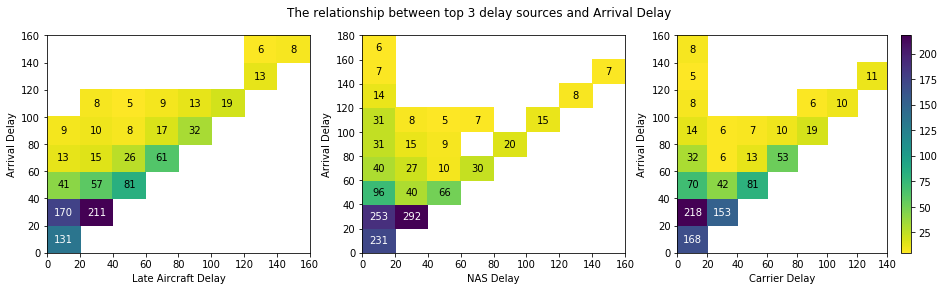

In [153]:

plt.figure(figsize=(16, 4))


bins_x = np.arange(0, 160+20, 20)
bins_y = np.arange(0, 180+20, 20)

x_limits = [(0, 160), (0, 160), (0, 140)]
y_limits = [(0, 160), (0, 180), (0, 160)]

for i, j in zip(delay_types[:3], range(len(delay_types)-4)):
    plt.subplot(1, 3, j+1)
    h2d = plt.hist2d(data=df_delayed_sample[df_delayed_sample[i]>0],
                 x=i, y='ArrDelay',
           bins=[bins_x, bins_y], cmin=5, cmap='viridis_r'); # I've set cmin to 5 to remove bins with very small counts
    heat_annotations(h2d[0], 10, 100)
    chart_metadata(xlabel=delay_labels[j], ylabel='Arrival Delay', xlim=x_limits[j], ylim=y_limits[j])

plt.colorbar();

plt.suptitle('The relationship between top 3 delay sources and Arrival Delay');

> **Insights:**
>- Relatively strong positive correlation exist between all three delays (Late Aircraft, NAS, Carrier) and Arrival delay. (as one of these increases, arrival delay increases too).
>- Most of the data lies between 0-60 minutes in both directions. 
>- However there are still too many points in each heatmap where arrival delay increase while other delay doesn't   

**Interesting**: I believe that the points which are not explained by the heatmaps are because several types of delays may occur simultaneously 

- Based on previous insight, will create a row for **CombinedDelay** to see the impact of all three delay types together (carrier, late aircraft and NAS delays) against arrival delay


In [154]:
df_delayed_sample['CombinedDelay'] = df_delayed_sample.CarrierDelay + df_delayed_sample.NASDelay + df_delayed_sample.LateAircraftDelay

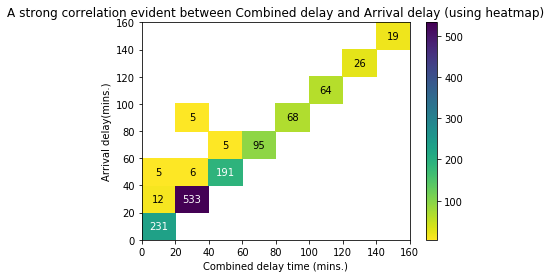

In [155]:
h2d = plt.hist2d(data=df_delayed_sample[df_delayed_sample.NASDelay>0],
                 x='CombinedDelay', y='ArrDelay',
           bins=[bins_x, bins_y], cmin=5, cmap='viridis_r');
plt.colorbar()

chart_metadata(xlabel='Combined delay time (mins.)',
               ylabel='Arrival delay(mins.)',
               xlim=(0, 160), ylim=(0,160),
               title='A strong correlation evident between Combined delay and Arrival delay (using heatmap)')
heat_annotations(h2d[0], 10, 200)

> Findings: 
>- Joining the three main sources of delay paints a much better picture. It's very clear now that when any/all of these types of delays increase, arrival delay increases too.
- Will show this relationship via a scatterplot.

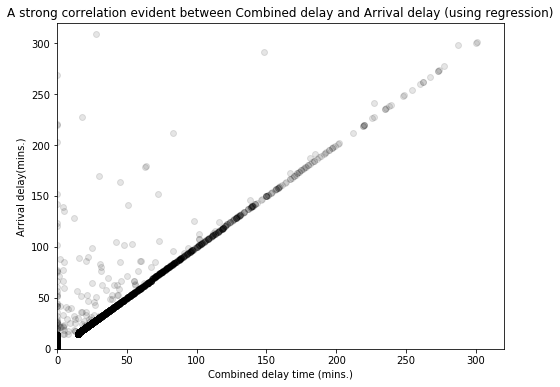

In [156]:
plt.figure(figsize=(8, 6))

sb.regplot(data=df_delayed_sample, x='CombinedDelay', y='ArrDelay', x_jitter=0.1,
            fit_reg=False, 
           scatter_kws={"color": "black", 'alpha' : 0.1}, line_kws={"color": "violet"})
chart_metadata(xlabel='Combined delay time (mins.)',
               ylabel='Arrival delay(mins.)',
               xlim=(0, 320), ylim=(0,320),
               title='A strong correlation evident between Combined delay and Arrival delay (using regression)')



>**Findings:**
>- The plot shows an ***incredibly strong*** correlation between the combined delay and Arrival delay. 
>- There is much **less noise** (points not explained by the plot) now.  


- Next will explore the relationship between arrival delay & departure hour

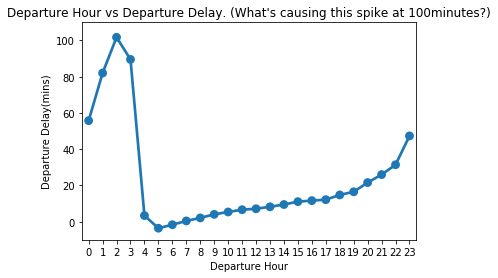

In [157]:
sb.pointplot(data=df_flights, x='DepHour', y='DepDelay', errwidth=0)
chart_metadata(xlabel='Departure Hour',
               ylabel='Departure Delay(mins)',
               ylim=(-10,110),
               title="Departure Hour vs Departure Delay. (What's causing this spike at 100minutes?)")



>**Insights:**
>- Flights starts with high averge delay, drop significantly, then increase steadily starting from 6 a.m. and throughout the day 
>- **Interestingly,** late night flights (between 0 - 4 a.m.) are showing signficant average delay. Although a relatively small number of flights take-off at this time(as seen in univariate exploration)

- I'll explore why late night flights show this peak

In [158]:
df_delayed_sample[(df_delayed_sample.DepHour<6) & (df_delayed_sample.CombinedDelay>0) ].sample(20)

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,DepHour,ArrHour,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,CombinedDelay
23644,2005,3,31,Thu,FL,FNT,ATL,644,5,7,16.0,2.0,2.0,0.0,14.0,0.0,0.0,16.0
84483,2008,2,5,Tue,OH,ALB,CVG,623,5,8,20.0,0.0,0.0,0.0,20.0,0.0,0.0,20.0
39388,2006,1,13,Fri,WN,BWI,BDL,283,1,2,220.0,230.0,0.0,0.0,0.0,0.0,220.0,220.0
67367,2007,6,28,Thu,OO,CLD,LAX,86,5,7,21.0,-2.0,21.0,0.0,0.0,0.0,0.0,21.0
85091,2008,2,12,Tue,UA,BOS,ORD,867,5,8,37.0,-10.0,0.0,0.0,37.0,0.0,0.0,37.0
32068,2005,8,23,Tue,FL,ATL,PHL,665,0,2,83.0,98.0,0.0,0.0,0.0,0.0,83.0,83.0
39388,2006,1,13,Fri,WN,BWI,BDL,283,1,2,220.0,230.0,0.0,0.0,0.0,0.0,220.0,220.0
88079,2008,3,6,Thu,WN,PHX,LAS,256,1,1,173.0,182.0,0.0,0.0,0.0,0.0,173.0,173.0
64228,2007,4,11,Wed,US,ORD,PHX,1440,4,7,29.0,0.0,0.0,0.0,29.0,0.0,0.0,29.0
85784,2008,2,27,Wed,EV,PVD,ATL,903,5,9,25.0,0.0,0.0,0.0,25.0,0.0,0.0,25.0


*Very high values of **late aircraft delay** is shown at these times. Carrier delay seems to be high too.  Will visualize this next*

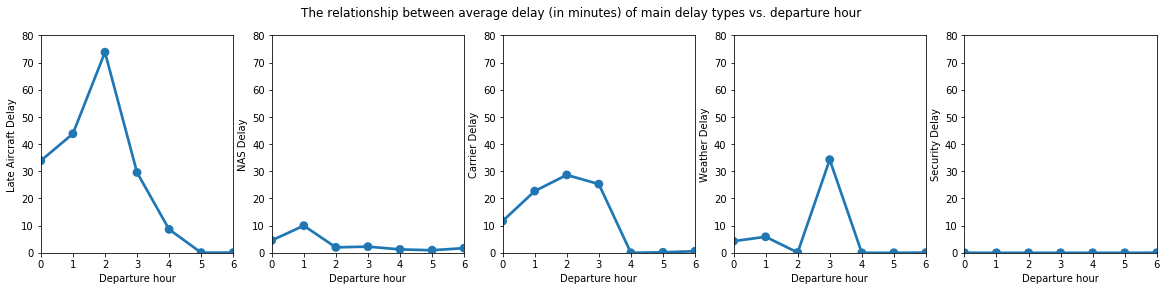

In [159]:
fig, ax = plt.subplots(ncols=5, figsize = [20,4])


for i, j in zip(delay_types[0:5], range(len(delay_types)-2)):
    plt.subplot(1,len(delay_types)-2,j+1)
    sb.pointplot(data=df_flights, x='DepHour', y=i, errwidth=0, color=base_color)    
    chart_metadata(xlabel='Departure hour',
                   ylabel=delay_labels[j],
                   xlim=(0, 6),ylim=(0,80))
                   
                   
                   
plt.suptitle('The relationship between average delay (in minutes) of main delay types vs. departure hour');


>**Findings:**
>- It's safe to say that late aircraft delay has been a major contributor to late departure and hence late flight arrival. 
>- It's also worth mentioning that carrier delay contirubtes to a lesser extent to these midinight flight delays.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>- Arrival delay seem to be very strongly correlated with Departure delay. This relationship is  salient especially when delay time increases. at small latencies, the relationship is relatively weak and it seems that so many other variables affect this relationship   
>- Also, arrival delay showed a superbly strong correlation with three sources of delay (carrier, late aircraft, and NAS). The relationship  between these variables & arrival delay is so strong to the extent that it's almost useless to draw a regression line (since the data points distribution draws the line already). T

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> One really surprising insight was regarding the relationship between hour of departure and flight departure delay.  Late-night flights shows a very high average delay time compared to flights taking off earlier in the day. This is weird since one would expect that late flights would face least amount of delay. Anyway further exploration shows that **late aircraft delay** plays a huge part in that. **One explanation** may be that carriers face issues with their previous late-night flights arriving late, causing subsequent flights to wait more time before it takes off. This issue needs further exploration beyond this project.

## Multivariate Exploration 

### In this final section ...

Will explore how some relationships between variables change over a period of 5 years (2004-2008)

- First, will explore how average departure & arrival delays have changed over the years

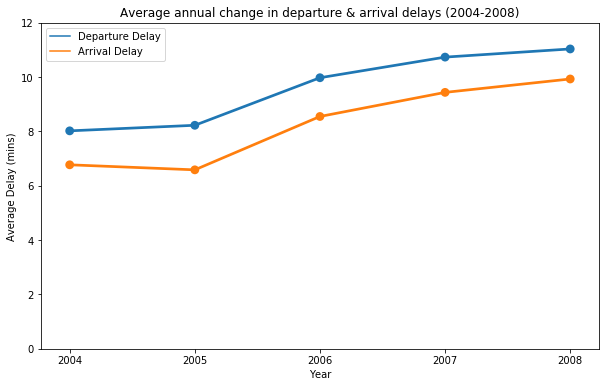

In [160]:
fig, ax = plt.subplots(figsize = [10, 6])

correlated_delays = ['DepDelay', 'ArrDelay']
colors = ['g','b']
correlated_labels = ['Departure Delay', 'Arrival Delay']

for d, j in zip(correlated_delays, range(len(correlated_delays))):
    sb.pointplot(data=df_flights, x='Year', y=d , errwidth=0, color=sb.color_palette()[j])
    ax.plot(np.NaN, np.NaN, '-', color=sb.color_palette()[j], label=correlated_labels[j])

plt.ylabel('Average Delay (mins)')
plt.ylim(0,12)
plt.title('Average annual change in departure & arrival delays (2004-2008)')
plt.legend();

> **Findings:**
>- It's interesting that both departure and arrival delays had more than 20% average increase over 5 years
>- Also, it's worth mentioning that although the 2 delays move together, average. departure delays are consistently larger than arrival delays. 

- Finally, I will look into the main five sources of arrival delay and how they changed over years.

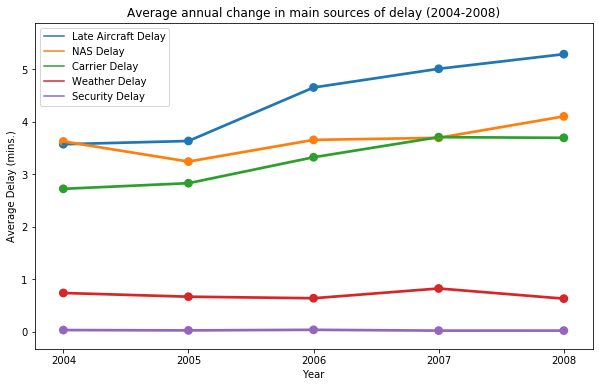

In [161]:
fig, ax = plt.subplots(figsize = [10,6])

    
for i, j in zip(delay_types[:5], range(len(delay_types)-2)):
    sb.pointplot(data=df_flights, x='Year', y=i, estimator=np.mean, errwidth=0, color=sb.color_palette()[j])
    ax.plot(np.NaN, np.NaN, '-', color=sb.color_palette()[j], label=delay_labels[j])

    
plt.ylabel('Average Delay (mins.)')
plt.title('Average annual change in main sources of delay (2004-2008)')
plt.legend()

>**Findings:**
>- Late Aircraft delay seem to have the largest average delay increase over 5 years. NAS & Carrier delays have also seen an annual increase but not as much as late aircraft
>- Weather & security delays were fairly steady over 5 years.

- To avoid being biased by average counts as it may not be statistically significant, I'll draw the same graph again using the total number of minutes for each type of delay 

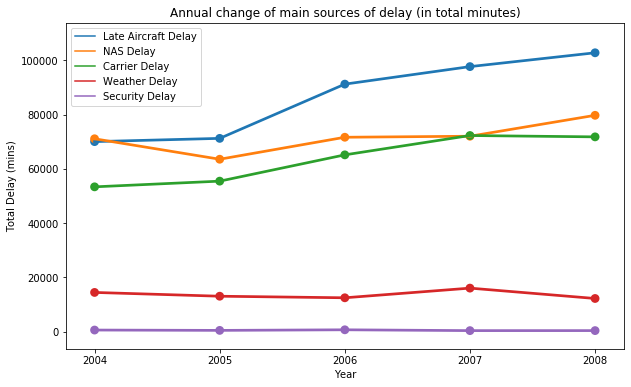

In [162]:
fig, ax = plt.subplots(figsize = [10,6])


for i, j in zip(delay_types[:5], range(len(delay_types)-2)):
    sb.pointplot(data=df_flights, x='Year', y=i, estimator=np.sum, errwidth=0, color=sb.color_palette()[j])
    ax.plot(np.NaN, np.NaN, '-', color=sb.color_palette()[j], label=delay_labels[j])

    
plt.ylabel('Total Delay (mins)')
plt.title('Annual change of main sources of delay (in total minutes)')
plt.legend();


>Using total counts paints an almost identical picture for delay types. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>- Average departure delay & arrival delay have consistently increased over the past 5 years. Interestingly, both variables have been moving together and increasing by the same absolute value over time.
>- Also, taking an deeper look at sources of delay shows some interesting insights. Average late arrival delay has increased the most over the years. This may be a main contributor to late arrival delay but obviously we need more data to make this claim

### Were there any interesting or surprising interactions between features?

> The most interesting part is that although departure & arrival delay move together(increase by the same amount), average departure delay is consistently larger than average arrival delay. There may be many explanations to this phenomenon, one of which is that carriers/pilots may take some measures to decrease delay wen a flight departs late. Anyway, it's clear that further exploration is needed in this regard

### *Finally I would suggest that ...*
>- ***The next step would be to understand the reasons for late aircraft delay and how to enhance it(reduce it). Since this seem to be a main driver for flight performance***

----------------------------------

# References

- On creating dataframe subsets:  
https://stackoverflow.com/questions/22258491/read-a-small-random-sample-from-a-big-csv-file-into-a-python-data-frame  
- Adding an empty plot for multiple legends:  
https://stackoverflow.com/questions/28078846/is-there-a-way-to-add-an-empty-entry-to-a-legend-in-matplotlib/28081279
- US flights data descriptions:  
https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations